In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Задание 1. Загрузите данные. Разделите исходный набор данных на обучающую и валидационную выборки.


In [0]:
base_dir = '/content/drive/My Drive/Bsuir - Big data/4 semester/MO/data/a6/'

In [0]:
train = pd.read_csv(base_dir + 'sign_mnist_train.csv')
test = pd.read_csv(base_dir + 'sign_mnist_test.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [6]:
train.shape

(27455, 785)

In [0]:
labels = train['label'].values
test_labels = test['label'].values

In [8]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [0]:
train.drop('label', axis = 1, inplace = True)
test.drop('label', axis = 1, inplace = True)

In [0]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [0]:
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
test_labels = label_binrizer.fit_transform(test_labels)

In [12]:
test_images.shape

(7172, 784)

In [13]:
labels.shape

(27455, 24)

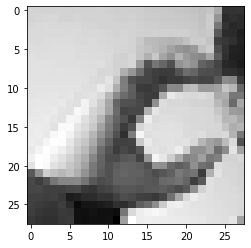

In [14]:
plt.imshow(images[3].reshape(28,28), cmap='gray')

In [0]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size = 0.3, random_state = 101)
x_test, y_test = (test_images, test_labels)

#### Задание 2. Реализуйте глубокую нейронную сеть со сверточными слоями. Какое качество классификации получено? Какая архитектура сети была использована?


In [0]:
batch_size = 128
num_classes = 24
epochs = 50
img_shape = 28

In [0]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [0]:
x_train = np.repeat(x_train.reshape(x_train.shape[0], 28, 28, 1), 3, axis=3)
x_val = np.repeat(x_val.reshape(x_val.shape[0], 28, 28, 1), 3, axis=3)
x_test = np.repeat(x_test.reshape(x_test.shape[0], 28, 28, 1), 3, axis=3)

In [19]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

ValueError: ignored

In [20]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________

Для данной задачи использована более простая свертоная сеть с тремя сверточными слоями и одним полносвязным слоем.

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
# history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=epochs, batch_size=batch_size)

In [23]:
# score, acc = model.evaluate(x_test, y_test)
# print('Test model accuracy:', acc)

ValueError: ignored

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        
        if img.shape[2] == 1:
          img = np.repeat(img, 3, axis=2)

        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Flipping the image horizontally

In [0]:
image_gen = ImageDataGenerator(horizontal_flip=True)
train_data_gen = image_gen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)

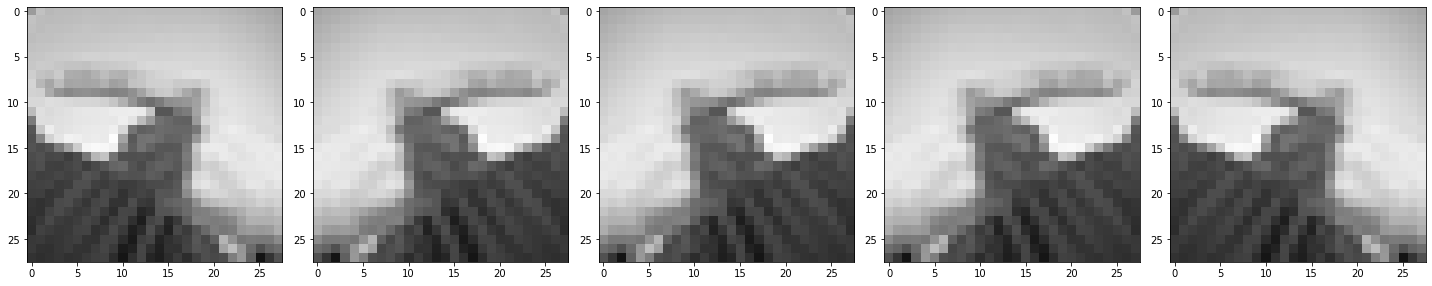

In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotating the image

In [0]:
image_gen = ImageDataGenerator(rotation_range=45)
train_data_gen = image_gen.flow(x_train, shuffle=True)

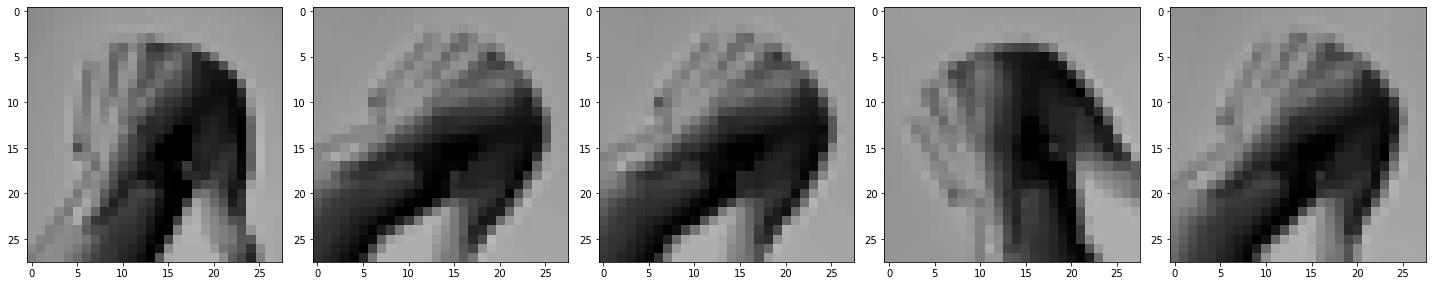

In [28]:
augmented_images = [train_data_gen[0][0] for i in range(5)]
plotImages(augmented_images)

### Applying Zoom

In [0]:
image_gen = ImageDataGenerator(zoom_range=0.5)
train_data_gen = image_gen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)

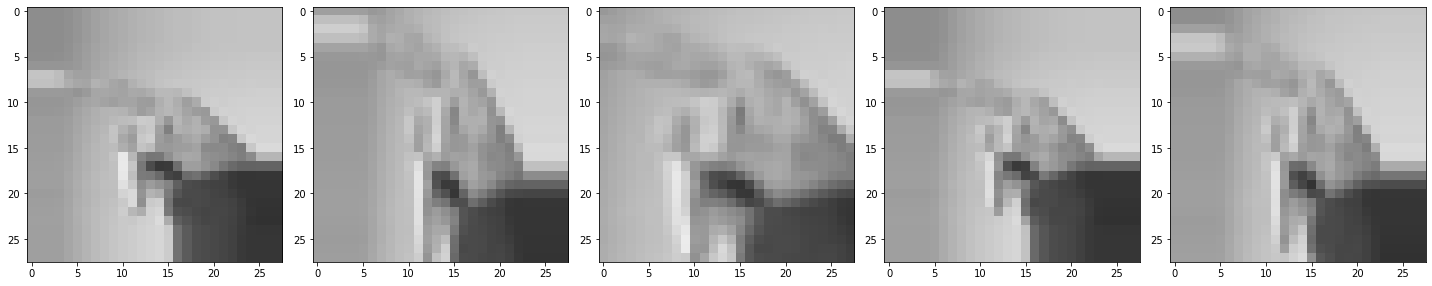

In [30]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Putting it all together

In [0]:
image_gen_train = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True)

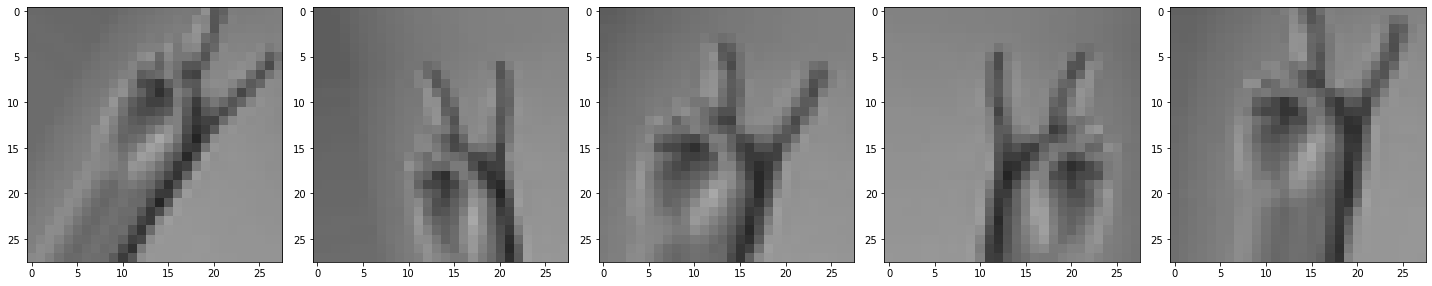

In [32]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Creating Validation Data generator

In [0]:
image_gen_val = ImageDataGenerator()
val_data_gen = image_gen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True)

In [0]:
# history = model.fit_generator(train_data_gen,
#                   steps_per_epoch=200,
#                   epochs=70,
#                   validation_data=val_data_gen,
#                   validation_steps=10,
#                   verbose=1)

In [0]:
# score, acc = model.evaluate(x_test, y_test)
# print('Test model accuracy:', acc)

#### Задание 4. Поэкспериментируйте с готовыми нейронными сетями (например, AlexNet, VGG16, Inception и т.п.), применив передаточное обучение. Как это повлияло на качество классификатора? Какой максимальный результат удалось получить на сайте Kaggle? Почему?

In [0]:
inception_base = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False)

x = inception_base.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(24, activation='softmax')(x)

inception_model=tf.keras.Model(inputs=inception_base.input, outputs=preds)

In [0]:
for layer in inception_model.layers:
    layer.trainable=False

for layer in inception_model.layers[50:]:
    layer.trainable=True

In [0]:
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
inception_history = inception_model.fit_generator(train_data_gen,
                   steps_per_epoch=200,
                   epochs=70,
                   validation_data=val_data_gen,
                   validation_steps=10,
                   verbose=1)

Epoch 1/70


In [45]:
val_data_gen[0][0].shape

(128, 28, 28, 3)

In [228]:
score, acc = inception_model.evaluate(x_test, y_test)
print('Test model accuracy:', acc)

ValueError: ignored